<a href="https://colab.research.google.com/github/hussain0048/Projects-/blob/master/Building_a_Real_Time_Emotion_Detection_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a Real Time Emotion Detection with Python
# **Introduction:**

Detecting real-time emotion of the person with a camera input is one of the advanced features in the machine learning process. The detection of emotion of a person using a camera is useful for various research and analytics purposes. The detection of emotion is made by using the machine learning concept. You can use the trained dataset to detect the emotion of the human being. For detecting the different emotions, first you need to train those different emotions, or you can use a dataset already available on the internet. In this article, we will discuss creating a Python program to detect real-time emotion of a human being using the camera '[1].

# 1-Installing Dependencies

In [ ]:
!pip install opencv-python

In [ ]:
!pip install tensor flow

In [ ]:
!pip install numpy

In [ ]:
!pip install pandas

In [ ]:
!pip install keras

In [ ]:
!pip install adam

In [ ]:
!pip install kwargs

In [ ]:
!pip install cinit

# 1 **Training the Dataset**#

For training purposes, I use the predefined un trained dataset CSV file as my main input for my input for training the machine. You can use the code given below for training the machine using the dataset. Before that, you need to ensure that all required files in the same repository where the program presents otherwise it will through some error. You can download the data set by clicking here.

# 2 - **Import library**


In [ ]:
import sys, os
import pandas as pd
import numpy as np

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.utils import np_utils
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

Using TensorFlow backend.


#2 - **Load Dataset** #
The both training and evaluation operations would be handled with Fec2013 dataset. Compressed version of the dataset takes 92 MB space whereas uncompressed version takes 295 MB space. There are 28K training and 3K testing images in the dataset. Each image was stored as 48×48 pixel. The pure dataset consists of image pixels (48×48=2304 values), emotion of each image and usage type (as train or test instance)[2].

In [ ]:
# this code is used to upload dataset from Pc to colab
from google.colab import files # Please First run this cod in chrom
def getLocalFiles():
    _files = files.upload() # upload StudentNextSessionf.csv datase
    if len(_files) >0: # Then run above  libray
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()

Saving la.jfif to la.jfif


In [ ]:
!wget -N https://www.kaggle.com/deadskull7/fer2013

In [ ]:
df=pd.read_csv('fer2013.csv')

#2-Data Description

In [ ]:
print(df.info())

In [ ]:
print(df["Usage"].value_counts())

In [ ]:
print(df.head())

# 3- **Data Spliting**

In [ ]:
X_train,train_y,X_test,test_y=[],[],[],[]

for index, row in df.iterrows():
    val=row['pixels'].split(" ")
    try:
        if 'Training' in row['Usage']:
           X_train.append(np.array(val,'float32'))
           train_y.append(row['emotion'])
        elif 'PublicTest' in row['Usage']:
           X_test.append(np.array(val,'float32'))
           test_y.append(row['emotion'])
    except:
        print(f"error occured at index :{index} and row:{row}")

In [ ]:
num_features = 64
num_labels = 7
batch_size = 64
epochs = 30
width, height = 48, 48

In [ ]:
X_train = np.array(X_train,'float32')
train_y = np.array(train_y,'float32')
X_test = np.array(X_test,'float32')
test_y = np.array(test_y,'float32')

In [ ]:
train_y=np_utils.to_categorical(train_y, num_classes=num_labels)
test_y=np_utils.to_categorical(test_y, num_classes=num_labels)

#4- **Normalizing data between 0 and 1**

In [ ]:
X_train -= np.mean(X_train, axis=0)
X_train /= np.std(X_train, axis=0)
X_test -= np.mean(X_test, axis=0)
X_test /= np.std(X_test, axis=0)
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

# 5- **Designing the CNN**


##5.1- **1st convolution layer**

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1:])))
model.add(Conv2D(64,kernel_size= (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

## 5.2 - **2nd Convolution Layer**

In [ ]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

## 5.3- **3rd Convolution Layer**

In [ ]:
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Flatten())

##5.4-  **Fully connected neural network**

In [ ]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_labels, activation='softmax'))
# model.summary()

#**6-Training**

##**6.1 Method1 Generator [2]**
We can train the network. To complete the training in less time, I prefer to implement learning with randomly selected trainset instances. That is the reason why train and fit generator used. Also, loss function would be cross entropy because the task is multi class classification [2]

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import keras
import keras.utils
from keras import utils as np_utils

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator()
train_generator = gen.flow(X_train, train_y, batch_size=batch_size)
model.compile(loss='categorical_crossentropy'
, optimizer=keras.optimizers.Adam()
, metrics=['accuracy']
)
model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs)

##6.2-**Method 2 Compliling the model**

In [ ]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, train_y,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, test_y),
          shuffle=True)

#7-**Saving the  model**

In [ ]:
fer_json = model.to_json()
with open("fer.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("fer.h5")

#8-**Evaluate model [2]**

In [ ]:
train_score = model.evaluate(X_train, train_y, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])
test_score = model.evaluate(X_test, test_y, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

# **9-Confusion Matrix**[2]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

pred_list = []; actual_list = []

for i in predictions:
  pred_list.append(np.argmax(i))

for i in Y_test:
  actual_list.append(np.argmax(i))

confusion_matrix(actual_list, pred_list)
Testing

#**10-Testing**[2]

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


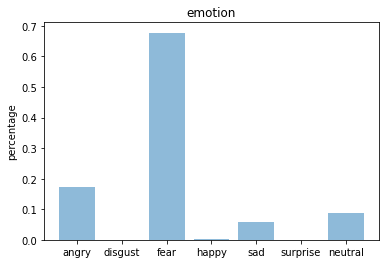

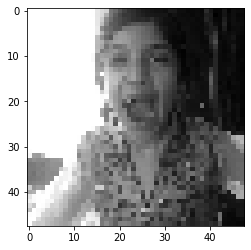

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from matplotlib import pyplot as plt
img = image.load_img("la.jfif", grayscale=True, target_size=(48, 48))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
x /= 255
custom = model.predict(x)
emotion_analysis(custom[0])
x = np.array(x, 'float32')
x = x.reshape([48, 48]);
plt.gray()
plt.imshow(x)
plt.show()

Emotions stored as numerical as labeled from 0 to 6. Keras would produce an output array including these 7 different emotion scores. We can visualize each prediction as bar chart.

In [ ]:
def emotion_analysis(emotions):
  objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
  y_pos = np.arange(len(objects))
  plt.bar(y_pos, emotions, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('percentage')
  plt.title('emotion')
  plt.show()

#**11-Detecting Real-Time Emotion**

In [ ]:
import os
import cv2
import numpy as np
from keras.models import model_from_json
from keras.preprocessing import image

In [ ]:
#load model
model = model_from_json(open("fer.json", "r").read())
#load weights
model.load_weights('fer.h5')

In [ ]:
face_haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [ ]:
cap=cv2.VideoCapture(0)

In [ ]:
cap=cv2.VideoCapture(0)
while True:
    ret,test_img=cap.read()# captures frame and returns boolean value and captured image
    #if not ret:
        #continue
    gray_img= cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)


    for (x,y,w,h) in faces_detected:
        cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0),thickness=7)
        roi_gray=gray_img[y:y+w,x:x+h]#cropping region of interest i.e. face area from  image
        roi_gray=cv2.resize(roi_gray,(48,48))
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis = 0)
        img_pixels /= 255

        predictions = model.predict(img_pixels)

        #find max indexed array
        max_index = np.argmax(predictions[0])

        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        predicted_emotion = emotions[max_index]

        cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

    resized_img = cv2.resize(test_img, (1000, 700))
    cv2.imshow('Facial emotion analysis ',resized_img)



    if cv2.waitKey(10) == ord('q'):#wait until 'q' key is pressed
        break

cap.release()
cv2.destroyAllWindows

References:

[1] Building a Real Time Emotion Detection with Python

https://morioh.com/p/801c509dda99?f=5c21f93bc16e2556b555ab2f

[2] Facial Expression Recognition with Keras
http://sefiks.com/2018/01/01/facial-expression-recognition-with-keras/

[3] Machine Learning Project | Facial Emotion Detection | part 2 Creating Webapp using Flask

https://www.youtube.com/watch?v=2mN7ygkc2XU&feature=youtu.be&fbclid=IwAR35sBAYwEakprFrmi12-4wW_54COtb8hcXdEdlCJjQ_en2JCi4zRA28bSs

